In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("godigt_cc_data.csv")

data

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Unnamed: 28
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,29-09-2019,B,0,1,1,...,0,0,0,0,0,T,"27,729",Self Employed,290000,NaN
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,30-10-2002,A,1,1,1,...,0,0,0,0,0,R,"2,80,854",0,950000,NaN
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,05-10-2013,C,0,0,0,...,1,0,0,0,0,R,"70,587",Student,210000,NaN
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,01-06-1999,E,0,1,1,...,0,0,1,0,0,T,"9,156",Self Employed,80000,NaN
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,13-06-2006,B,1,1,1,...,1,0,0,0,0,T,"38,108",Salaried,220000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,10-01-2010,A,1,1,1,...,0,0,0,0,0,T,"1,08,713",0,970000,NaN
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,19-07-2006,A,0,1,1,...,0,0,0,0,0,T,"42,369",Salaried,200000,NaN
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,15-02-2006,D,0,1,1,...,0,0,0,0,0,T,"8,459",Retired,90000,NaN
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,06-11-2003,C,0,0,0,...,1,0,0,0,0,T,"57,100",Salaried,210000,NaN


In [3]:
## This describe() will give the basic details of data
pd.DataFrame(data.describe().T.drop(columns="count"))

,mean,std,min,25%,50%,75%,max
userid,4224.500000,2438.871870,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,436747.044508,30489.752417,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,0.292377,0.454881,0.0,0.00,0.0,1.00,1.0
active_60,0.494792,0.500002,0.0,0.00,0.0,1.00,1.0
active_90,0.642045,0.479427,0.0,0.00,1.0,1.00,1.0
cc_active30,0.284091,0.451007,0.0,0.00,0.0,1.00,1.0
cc_active60,0.484493,0.499789,0.0,0.00,0.0,1.00,1.0
cc_active90,0.632339,0.482197,0.0,0.00,1.0,1.00,1.0
widget_products,3.614583,2.273193,0.0,2.00,4.0,6.00,7.0
engagement_products,3.991596,2.572045,0.0,2.00,4.0,6.00,8.0


In [4]:
# This will give all the required details of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   userid                     8448 non-null   int64  
 1   card_no                    8448 non-null   object 
 2   card_bin_no                8448 non-null   int64  
 3   Issuer                     8448 non-null   object 
 4   card_type                  8448 non-null   object 
 5   card_source_date           8448 non-null   object 
 6   high_networth              8448 non-null   object 
 7   active_30                  8448 non-null   int64  
 8   active_60                  8448 non-null   int64  
 9   active_90                  8448 non-null   int64  
 10  cc_active30                8448 non-null   int64  
 11  cc_active60                8448 non-null   int64  
 12  cc_active90                8448 non-null   int64  
 13  hotlist_flag               8448 non-null   objec

In [5]:
# This will help you to find total Number of nan Values
data.isnull().sum()

userid                          0
card_no                         0
card_bin_no                     0
Issuer                          0
card_type                       0
card_source_date                0
high_networth                   0
active_30                       0
active_60                       0
active_90                       0
cc_active30                     0
cc_active60                     0
cc_active90                     0
hotlist_flag                    0
widget_products                 0
engagement_products             0
 annual_income_at_source        0
other_bank_cc_holding           0
bank_vintage                    0
T+1_month_activity              0
T+2_month_activity              0
T+3_month_activity              0
T+6_month_activity              0
T+12_month_activity             0
Transactor_revolver            38
 avg_spends_l3m                 0
Occupation_at_source            0
cc_limit                        0
Unnamed: 28                  8448
dtype: int64

In [6]:
# Drop Unnamed column as it has all null values 
data=data.drop(["Unnamed: 28"],axis=1)
data

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,29-09-2019,B,0,1,1,...,27,0,0,0,0,0,T,"27,729",Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,30-10-2002,A,1,1,1,...,52,0,0,0,0,0,R,"2,80,854",0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,05-10-2013,C,0,0,0,...,23,1,0,0,0,0,R,"70,587",Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,01-06-1999,E,0,1,1,...,49,0,0,1,0,0,T,"9,156",Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,13-06-2006,B,1,1,1,...,21,1,0,0,0,0,T,"38,108",Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,10-01-2010,A,1,1,1,...,47,0,0,0,0,0,T,"1,08,713",0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,19-07-2006,A,0,1,1,...,52,0,0,0,0,0,T,"42,369",Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,15-02-2006,D,0,1,1,...,36,0,0,0,0,0,T,"8,459",Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,06-11-2003,C,0,0,0,...,54,1,0,0,0,0,T,"57,100",Salaried,210000


In [7]:
# This will drop all null values from data
data=data.dropna()
data

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,29-09-2019,B,0,1,1,...,27,0,0,0,0,0,T,"27,729",Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,30-10-2002,A,1,1,1,...,52,0,0,0,0,0,R,"2,80,854",0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,05-10-2013,C,0,0,0,...,23,1,0,0,0,0,R,"70,587",Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,01-06-1999,E,0,1,1,...,49,0,0,1,0,0,T,"9,156",Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,13-06-2006,B,1,1,1,...,21,1,0,0,0,0,T,"38,108",Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,10-01-2010,A,1,1,1,...,47,0,0,0,0,0,T,"1,08,713",0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,19-07-2006,A,0,1,1,...,52,0,0,0,0,0,T,"42,369",Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,15-02-2006,D,0,1,1,...,36,0,0,0,0,0,T,"8,459",Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,06-11-2003,C,0,0,0,...,54,1,0,0,0,0,T,"57,100",Salaried,210000


In [8]:
## Check null values again
data.isnull().sum()

userid                       0
card_no                      0
card_bin_no                  0
Issuer                       0
card_type                    0
card_source_date             0
high_networth                0
active_30                    0
active_60                    0
active_90                    0
cc_active30                  0
cc_active60                  0
cc_active90                  0
hotlist_flag                 0
widget_products              0
engagement_products          0
 annual_income_at_source     0
other_bank_cc_holding        0
bank_vintage                 0
T+1_month_activity           0
T+2_month_activity           0
T+3_month_activity           0
T+6_month_activity           0
T+12_month_activity          0
Transactor_revolver          0
 avg_spends_l3m              0
Occupation_at_source         0
cc_limit                     0
dtype: int64

In [9]:
data[' annual_income_at_source ']

0        15,52,111 
1        48,33,871 
2        13,45,429 
3         8,80,560 
4        18,08,582 
           ...     
8443     36,17,288 
8444     36,61,676 
8445     12,74,059 
8446     12,71,148 
8447     13,29,756 
Name:  annual_income_at_source , Length: 8410, dtype: object

In [10]:
## To check discperancies 
data.Issuer.unique()

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [11]:
data.card_type.unique()

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [12]:
## Found 0 in below column
data["Occupation_at_source"]

0       Self Employed
1                   0
2             Student
3       Self Employed
4            Salaried
            ...      
8443                0
8444         Salaried
8445          Retired
8446         Salaried
8447          Retired
Name: Occupation_at_source, Length: 8410, dtype: object

In [13]:
# Replace 0 to na 
data["Occupation_at_source"] = data["Occupation_at_source"].replace("0",np.nan) 

C:\Users\masoo\AppData\Local\Temp\ipykernel_15404\119756739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Occupation_at_source"] = data["Occupation_at_source"].replace("0",np.nan)


In [14]:
## Check if 0 has been replaced by null values
data["Occupation_at_source"]

0       Self Employed
1                 NaN
2             Student
3       Self Employed
4            Salaried
            ...      
8443              NaN
8444         Salaried
8445          Retired
8446         Salaried
8447          Retired
Name: Occupation_at_source, Length: 8410, dtype: object

In [15]:
## Replace NaN with beforevalue and aftervalue
data["Occupation_at_source"] = data["Occupation_at_source"].fillna(method='pad')
data["Occupation_at_source"] = data["Occupation_at_source"].fillna(method='bfill')

C:\Users\masoo\AppData\Local\Temp\ipykernel_15404\1878687041.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Occupation_at_source"] = data["Occupation_at_source"].fillna(method='pad')
C:\Users\masoo\AppData\Local\Temp\ipykernel_15404\1878687041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Occupation_at_source"] = data["Occupation_at_source"].fillna(method='pad')
C:\Users\masoo\AppData\Local\Temp\ipykernel_15404\1878687041.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Occupation_at_source"] = data["Occupation_at_source"].fillna(method='bf

In [16]:
## Check again to see if null values has been replaced or not 
data["Occupation_at_source"]

0       Self Employed
1       Self Employed
2             Student
3       Self Employed
4            Salaried
            ...      
8443    Self Employed
8444         Salaried
8445          Retired
8446         Salaried
8447          Retired
Name: Occupation_at_source, Length: 8410, dtype: object

In [17]:
# 
iss=data.groupby("Issuer")["Issuer"].count()
iss

Issuer
Amex           438
Mastercard     727
Visa          7245
Name: Issuer, dtype: int64

<Axes: xlabel='Issuer'>

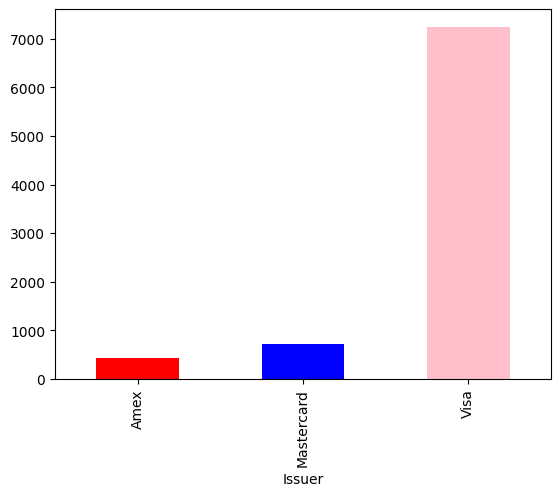

In [18]:
iss.plot.bar(color=["red","blue","pink"])

In [19]:
ct=data.groupby("card_type")["card_type"].count().sort_values(ascending=False)

ct

card_type
rewards       1493
prosperity    1003
edge           975
chartered      916
smartearn      760
shoprite       686
indianoil      677
cashback       676
aura           650
gold           144
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

<Axes: xlabel='card_type'>

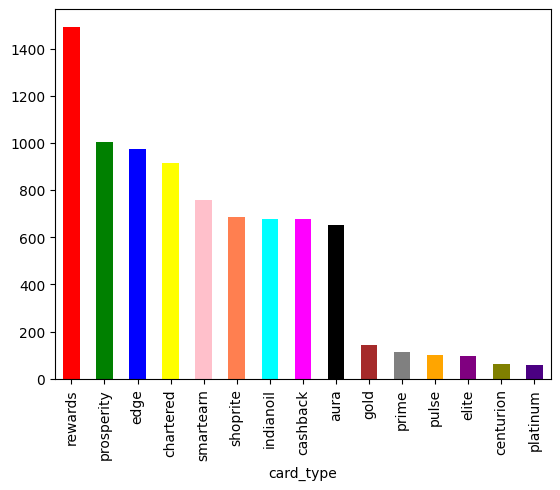

In [20]:
ct.plot.bar(color=["red","green","blue","yellow","pink","coral","cyan","magenta","black","brown","gray","orange","purple","olive","indigo"])

In [21]:
o=data.groupby("Occupation_at_source")["Occupation_at_source"].count()

o

Occupation_at_source
Housewife         397
Retired          1096
Salaried         4023
Self Employed    2255
Student           639
Name: Occupation_at_source, dtype: int64

<Axes: xlabel='Occupation_at_source'>

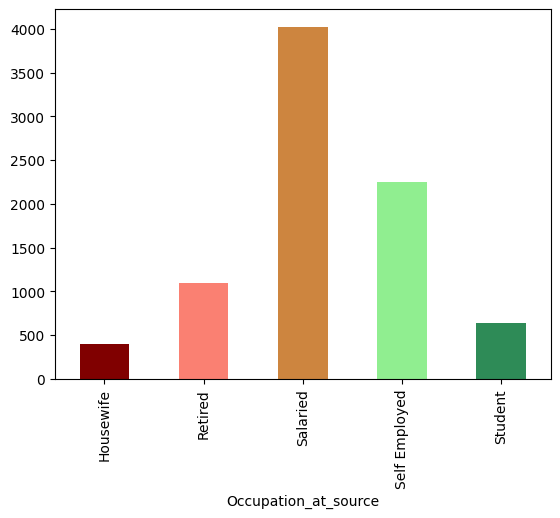

In [22]:
o.plot.bar(color=["maroon","salmon","peru","lightgreen","seagreen"])

In [23]:
a=data[["Occupation_at_source","Issuer","card_type"," avg_spends_l3m "]]
a

,Occupation_at_source,Issuer,card_type,avg_spends_l3m
0,Self Employed,Visa,edge,"27,729"
1,Self Employed,Visa,prosperity,"2,80,854"
2,Student,Visa,rewards,"70,587"
3,Self Employed,Visa,indianoil,"9,156"
4,Salaried,Visa,edge,"38,108"
...,...,...,...,...
8443,Self Employed,Visa,chartered,"1,08,713"
8444,Salaried,Amex,centurion,"42,369"
8445,Retired,Visa,rewards,"8,459"
8446,Salaried,Visa,indianoil,"57,100"


In [24]:
a.groupby(["Occupation_at_source","Issuer","card_type"])[" avg_spends_l3m "].count()

Occupation_at_source  Issuer      card_type 
Housewife             Amex        centurion      1
                                  gold           6
                                  rewards        5
                                  smartearn      8
                      Mastercard  aura           4
                                                ..
Student               Visa        prime          1
                                  prosperity    89
                                  rewards       86
                                  shoprite      38
                                  smartearn     41
Name:  avg_spends_l3m , Length: 111, dtype: int64

## 1.Card_type – With this we will need to idenfy if the correct type of card is issued to the correct population, which will be done by identifying the relation primarily with high_networth and Occupaton_at_source as well as other columns

In [40]:
ct=data.groupby(["high_networth","card_type","Occupation_at_source"])["Occupation_at_source"].count()
ct

high_networth  card_type  Occupation_at_source
A              centurion  Salaried                 18
                          Self Employed            13
                          Student                   2
               chartered  Housewife                 4
                          Retired                   7
                                                 ... 
E              smartearn  Housewife                36
                          Retired                  71
                          Salaried                131
                          Self Employed            35
                          Student                  14
Name: Occupation_at_source, Length: 175, dtype: int64

<Axes: xlabel='high_networth,card_type,Occupation_at_source'>

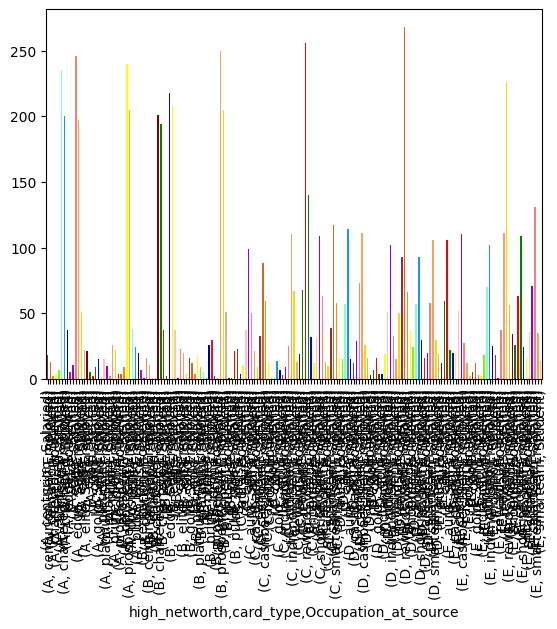

In [41]:
ct.plot.bar(color=["brown","chocolate","darkorange","yellow","lawngreen","aquamarine","dodgerblue","navy","crimson","darkviolet","salmon","sandybrown","gold","tan","maroon","green","red","green","blue","yellow","pink","darkviolet","salmon","sandybrown","gold"])

## 2-high_networth – This variable shows us the net worth of each individual from A to E category, A beingHigh and E being low, Analysis will need to be done in comparison primarily to Card_type and Occupation at Source.

In [34]:
data.groupby(["card_type","Occupation_at_source"])["Occupation_at_source"].count()

card_type  Occupation_at_source
aura       Housewife                38
           Retired                 153
           Salaried                319
           Self Employed            87
           Student                  53
                                  ... 
smartearn  Housewife                66
           Retired                 168
           Salaried                354
           Self Employed           123
           Student                  49
Name: Occupation_at_source, Length: 70, dtype: int64

In [42]:
co=data.groupby(["card_type","Occupation_at_source"])["card_type"].count()
co

card_type  Occupation_at_source
aura       Housewife                38
           Retired                 153
           Salaried                319
           Self Employed            87
           Student                  53
                                  ... 
smartearn  Housewife                66
           Retired                 168
           Salaried                354
           Self Employed           123
           Student                  49
Name: card_type, Length: 70, dtype: int64

<Axes: xlabel='card_type,Occupation_at_source'>

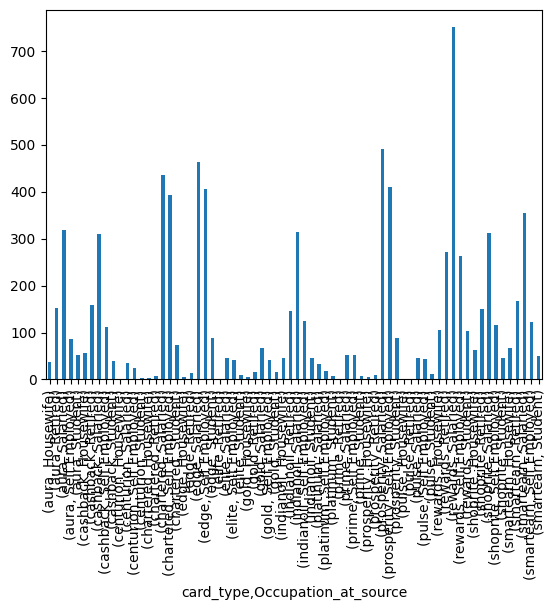

In [43]:
co.plot.bar()

In [49]:
data.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       ' annual_income_at_source ', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       ' avg_spends_l3m ', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [53]:
data.groupby("hotlist_flag")["hotlist_flag"].count()

hotlist_flag
N    8410
Name: hotlist_flag, dtype: int64

In [54]:
data.groupby("active_30")["active_30"].count()

active_30
0    5950
1    2460
Name: active_30, dtype: int64

In [56]:
data.groupby("active_60")["active_60"].count()

active_60
0    4249
1    4161
Name: active_60, dtype: int64

In [57]:
data.groupby("active_90")["active_90"].count()

active_90
0    3007
1    5403
Name: active_90, dtype: int64

In [58]:
data.groupby(["card_type","active_30","active_60","active_90"])["card_type"].count()

card_type   active_30  active_60  active_90
aura        0          0          0            233
                                  1             98
                       1          1            128
            1          1          1            191
cashback    0          0          0            233
                                  1             99
                       1          1            137
            1          1          1            207
centurion   0          0          0             20
                                  1             12
                       1          1             15
            1          1          1             15
chartered   0          0          0            345
                                  1            136
                       1          1            186
            1          1          1            249
edge        0          0          0            348
                                  1            135
                       1          1   